In [2]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

## Storing and reading the csv files

In [3]:
holiday_events = pd.read_csv('holidays_events.csv')
print(holiday_events.describe())
holiday_events.head()

              date     type    locale locale_name description transferred
count          350      350       350         350         350         350
unique         312        6         3          24         103           2
top     2014-06-25  Holiday  National     Ecuador    Carnaval       False
freq             4      221       174         174          10         338


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [5]:
oil = pd.read_csv('oil.csv', parse_dates = ['date'], index_col = 'date')
oil_test = oil.loc['2017-08-16' : '2017-08-31']
oil_test

,dcoilwtico
date,
2017-08-16,46.80
2017-08-17,47.07
2017-08-18,48.59
2017-08-21,47.39
2017-08-22,47.65
2017-08-23,48.45
2017-08-24,47.24
2017-08-25,47.65
2017-08-28,46.40


In [6]:
stores = pd.read_csv('stores.csv')
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
train_df = pd.read_csv('train.csv', parse_dates = ['date'], index_col = 'date')
train_df.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [8]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [9]:
transactions = pd.read_csv('transactions.csv')
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


# Earthquake consequences on sales data




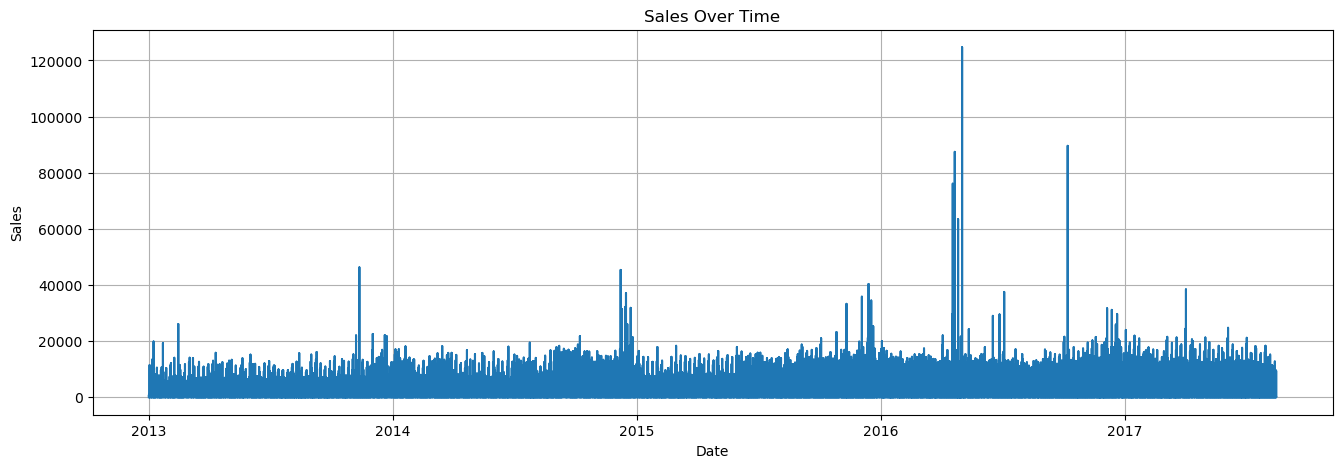

In [14]:
plt.figure(figsize=(16, 5))
plt.plot( train_df['sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

#### A closer look into the earthquake consequences reflected in sales.

Let's explore the large spike between 2016 and 2017

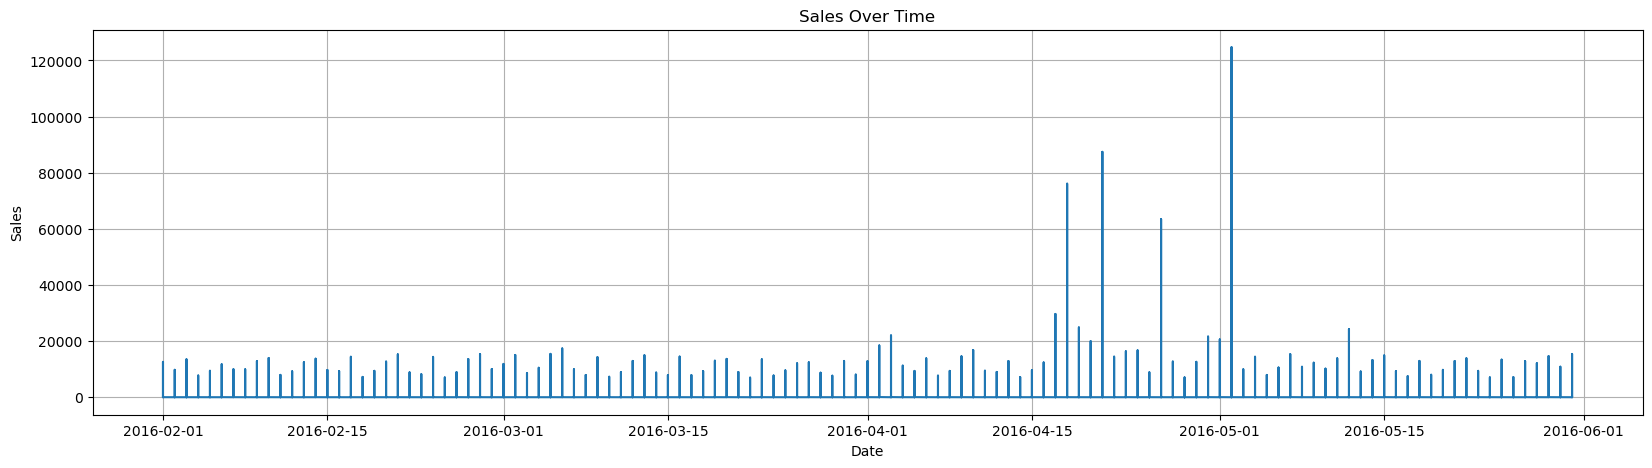

In [15]:
sample = train_df.loc['2016-02':'2016-05']
plt.figure(figsize=(20, 5))
plt.plot(sample['sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Adding features to the train_df and store_df


In [18]:
# adding sales and onpromotion values to the stores dataframe.
sales_and_onpromotion = train_df.groupby('store_nbr')[['sales', 'onpromotion']].sum()
stores = pd.merge(stores, sales_and_onpromotion, on = 'store_nbr', how = 'right')
stores.head(5)

,store_nbr,city,state,type,cluster,sales,onpromotion
0,1,Quito,Pichincha,D,13,1.414501e+07,138020
1,2,Quito,Pichincha,D,13,2.155739e+07,158149
2,3,Quito,Pichincha,D,8,5.048191e+07,177075
3,4,Quito,Pichincha,D,9,1.890970e+07,151932
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4,1.559240e+07,149370


In [21]:
total_transacts = transactions.groupby('store_nbr')['transactions'].sum()
stores = pd.merge(stores, total_transacts, on = 'store_nbr', how = 'right')
stores.head()

,store_nbr,city,state,type,cluster,sales,onpromotion,transactions
0,1,Quito,Pichincha,D,13,1.414501e+07,138020,2553963
1,2,Quito,Pichincha,D,13,2.155739e+07,158149,3219901
2,3,Quito,Pichincha,D,8,5.048191e+07,177075,5366350
3,4,Quito,Pichincha,D,9,1.890970e+07,151932,2519007
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4,1.559240e+07,149370,2347877


In [ ]:
original_index = train_df.index
train_df = pd.merge(train_df, stores[['store_nbr', 'city', 'state']], on='store_nbr', how='left')
train_df.index = original_index

In [27]:
train_df.holiday.value_counts()

holiday
0    2758536
1     242352
Name: count, dtype: int64

In [28]:
# Mark Local/Regional Holidays
local_regional_holidays = holiday_events[holiday_events['locale'] != 'National']
for index, row in local_regional_holidays.iterrows():
    # matching on city
    if 'city' in train_df.columns:
        train_df.loc[(train_df.index == row['date']) & (train_df['city'] == row['locale_name']), 'holiday'] = 1
    # matching on state
    elif 'state' in train_df.columns:
        train_df.loc[(train_df.index == row['date']) & (train_df['state'] == row['locale_name']), 'holiday'] = 1

In [29]:
train_df.holiday.value_counts()

holiday
0    2747118
1     253770
Name: count, dtype: int64

In [30]:
train_df.columns

Index(['id', 'store_nbr', 'family', 'sales', 'onpromotion', 'holiday', 'city',
       'state'],
      dtype='object')

## Sale Distributions by Cities, Product Family and Store Number.


In [31]:
city_sales = train_df.groupby([train_df.index, train_df['city']])['sales'].sum()

In [98]:
city_sales = city_sales.reset_index()

In [99]:
city_sales.set_index('date', inplace=True)

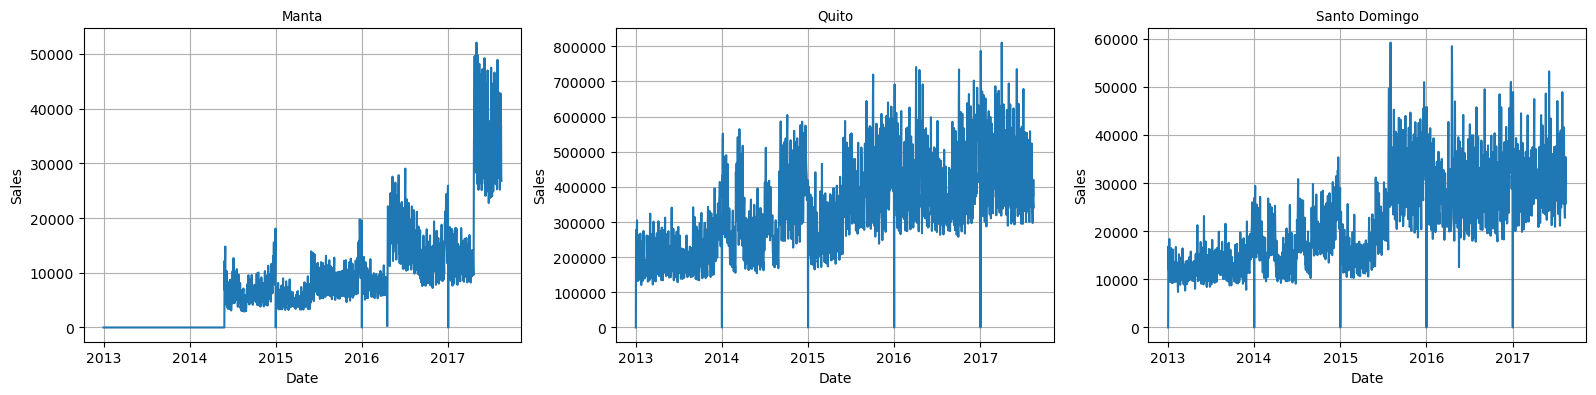

In [100]:
cities = ['Manta','Quito','Santo Domingo']
num_categories = len(cities)

# Define the number of rows and columns for the subplots
ncols = 3
nrows = (num_categories // ncols) + (num_categories % ncols > 0)  # Ensure enough rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over

plt.rcParams.update({'font.size': 8})

# Plot each time series
for i, city in enumerate(cities):
    # Filter sales data for the current city
    sales_data = city_sales[city_sales['city'] == city]
    axes[i].plot(sales_data.index, sales_data['sales'])  # Plot date vs sales for the city
    axes[i].set_title(city)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Sales')
    axes[i].grid(True)

# Remove any unused subplots
for j in range(num_categories, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

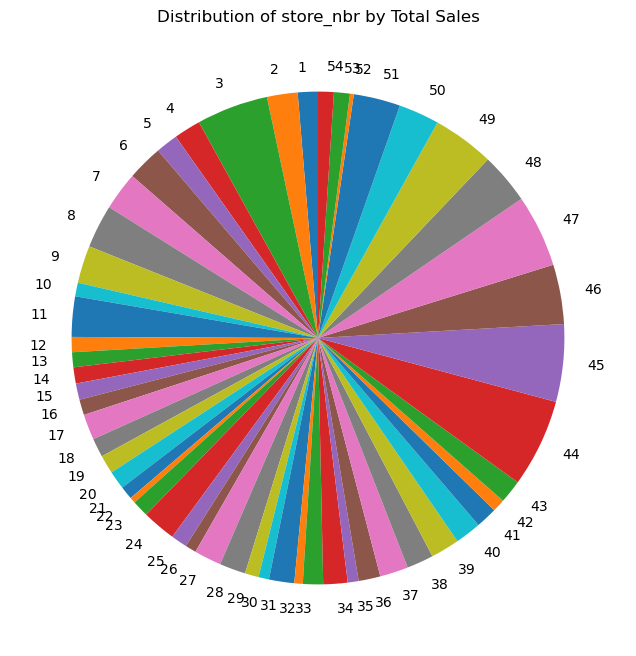

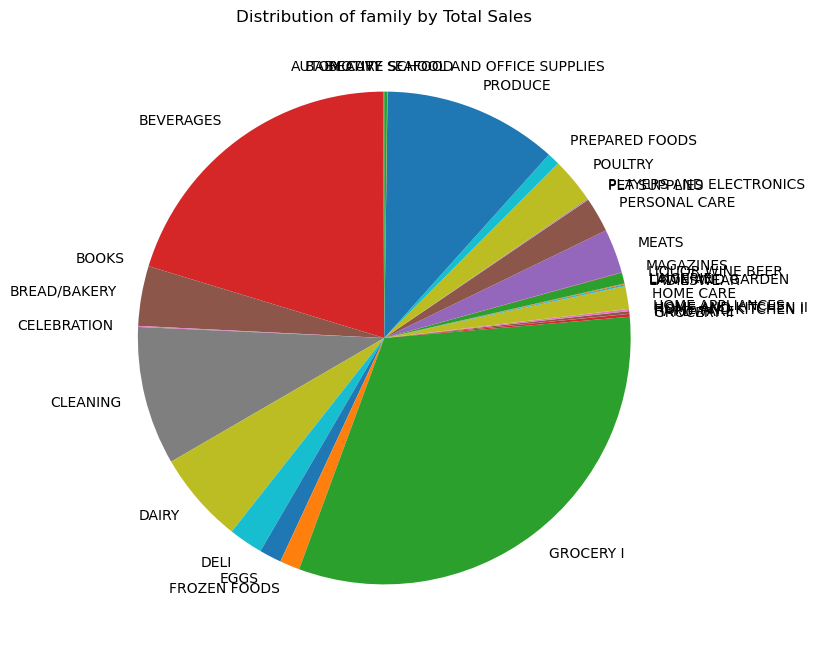

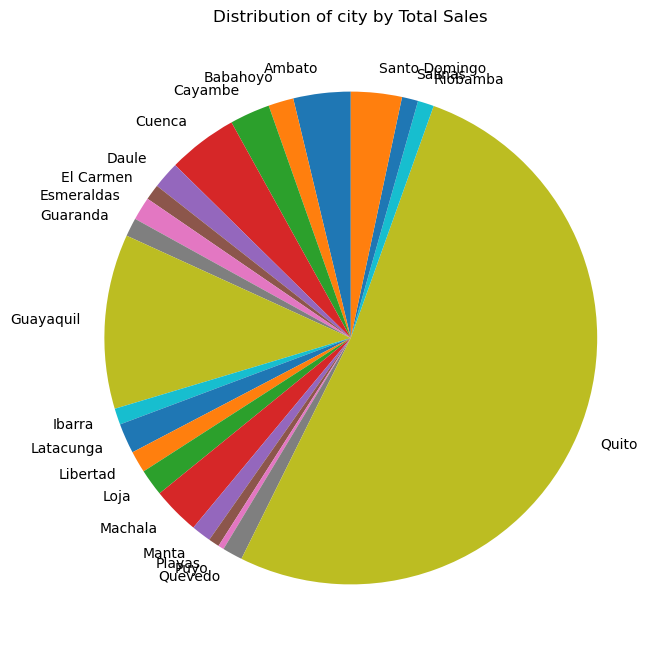

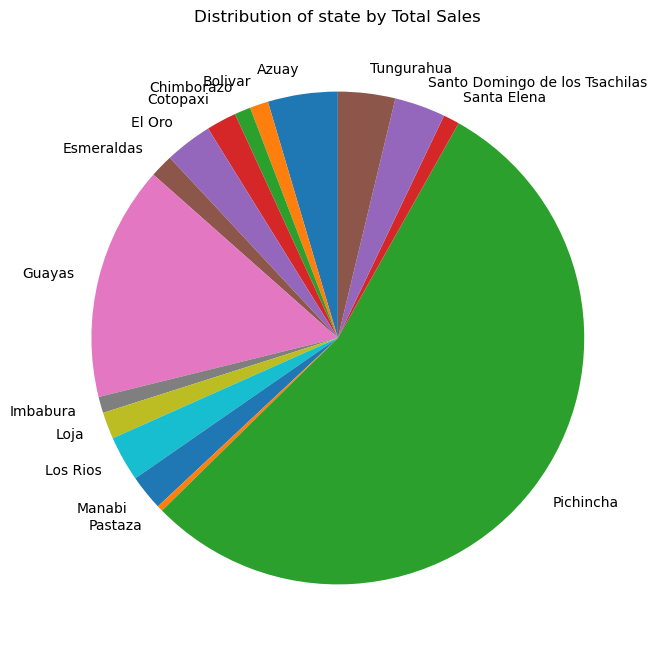

In [36]:
dist_col  = ['store_nbr', 'family', 'city', 'state']
for col in dist_col:
    train_df[col] = train_df[col].astype('category')
    plt.figure(figsize=(10, 8))
    train_df.groupby(col)['sales'].sum().plot.pie(startangle=90)
    plt.title(f'Distribution of {col} by Total Sales')
    plt.ylabel('')
    plt.show()


A better visualisation method can be plotting a barplot:

<Axes: xlabel='sales', ylabel='family'>

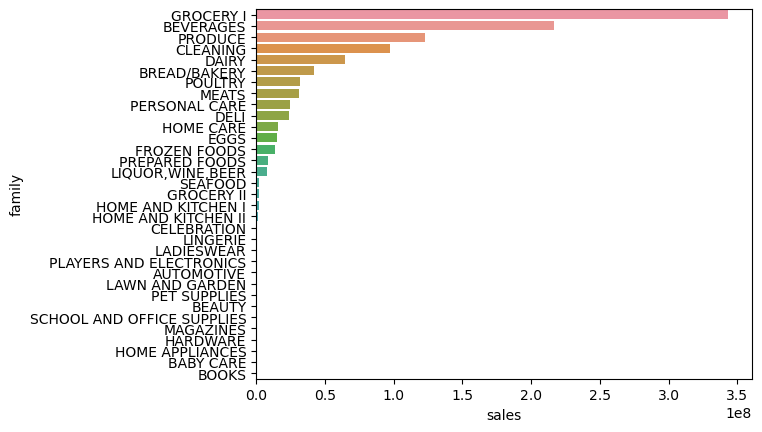

In [37]:
family_exp = train_df.groupby('family')['sales'].sum().sort_values(ascending = False).reset_index()

sns.barplot(x = 'sales', y = family_exp.family, data = family_exp, order = family_exp.family.tolist())


## Further Exploring Sales


In [51]:
sales = pd.DataFrame(sales)
sales['lag1'] = sales['sales'].shift(1)
sales['lag7'] = sales['sales'].shift(7)
sales['lag30'] = sales['sales'].shift(30)
sales['lag_year'] = sales['sales'].shift(365)

sales

,sales,lag1,lag7,lag30,lag_year
date,,,,,
2013-01-01,2511.618999,NaN,NaN,NaN,NaN
2013-01-02,496092.417944,2511.618999,NaN,NaN,NaN
2013-01-03,361461.231124,496092.417944,NaN,NaN,NaN
2013-01-04,354459.677093,361461.231124,NaN,NaN,NaN
2013-01-05,477350.121229,354459.677093,NaN,NaN,NaN
...,...,...,...,...,...
2017-08-11,826373.722022,651386.911970,8.277757e+05,7.488000e+05,658457.436112
2017-08-12,792630.535079,826373.722022,9.656937e+05,6.296514e+05,596729.279945
2017-08-13,865639.677471,792630.535079,1.049559e+06,7.654896e+05,745662.505149


In [52]:
sales.dropna()

,sales,lag1,lag7,lag30,lag_year
date,,,,,
2014-01-02,801011.226041,8602.065404,4.707312e+05,4.954884e+05,2511.618999
2014-01-03,680672.845603,801011.226041,4.793150e+05,4.244380e+05,496092.417944
2014-01-04,936628.886604,680672.845603,5.569523e+05,4.241470e+05,361461.231124
2014-01-05,949618.788940,936628.886604,4.997195e+05,3.864068e+05,354459.677093
2014-01-06,602268.564009,949618.788940,6.351347e+05,4.326618e+05,477350.121229
...,...,...,...,...,...
2017-08-11,826373.722022,651386.911970,8.277757e+05,7.488000e+05,658457.436112
2017-08-12,792630.535079,826373.722022,9.656937e+05,6.296514e+05,596729.279945
2017-08-13,865639.677471,792630.535079,1.049559e+06,7.654896e+05,745662.505149


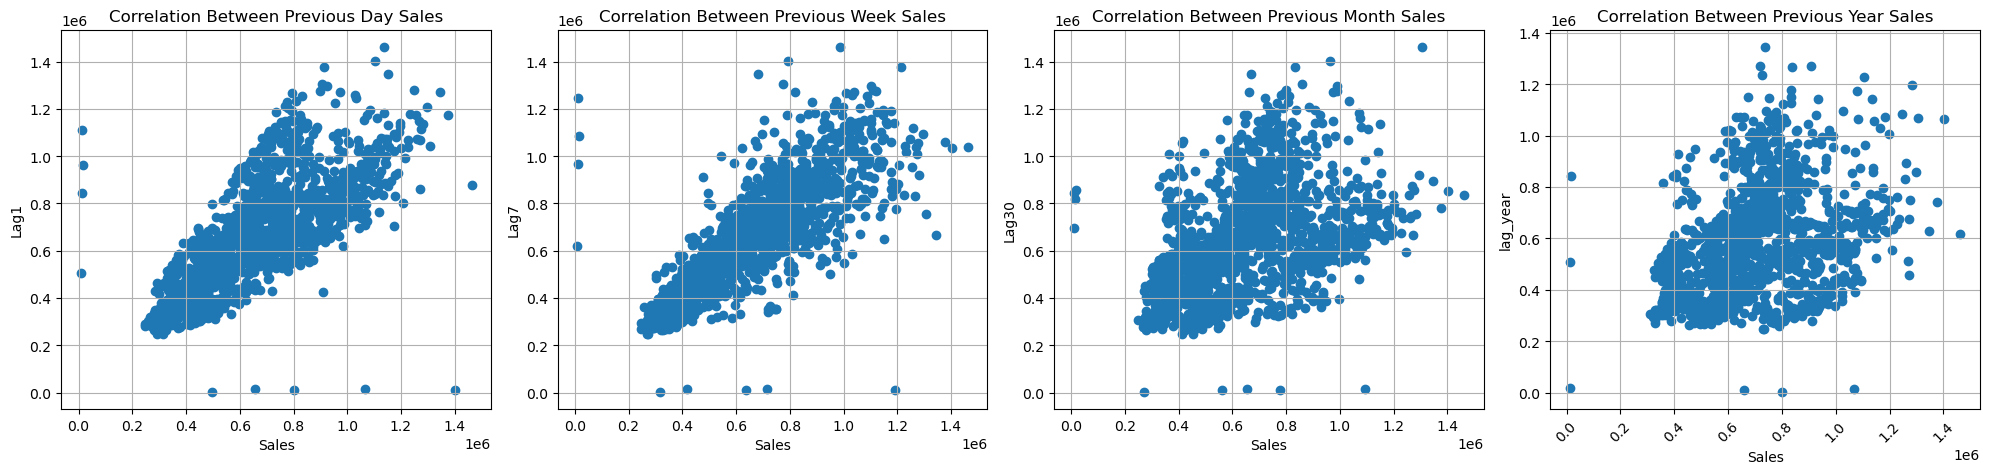

In [53]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].scatter(sales['sales'], sales['lag1'], marker='o', linestyle='-')
ax[0].set_title('Correlation Between Previous Day Sales')
ax[0].set_xlabel('Sales')
ax[0].set_ylabel('Lag1')
ax[0].grid(True)

ax[1].scatter(sales['sales'], sales['lag7'], marker='o', linestyle='-')
ax[1].set_title('Correlation Between Previous Week Sales')
ax[1].set_xlabel('Sales')
ax[1].set_ylabel('Lag7')
ax[1].grid(True)

ax[2].scatter(sales['sales'], sales['lag30'], marker='o', linestyle='-')
ax[2].set_title('Correlation Between Previous Month Sales')
ax[2].set_xlabel('Sales')
ax[2].set_ylabel('Lag30')
ax[2].grid(True)

ax[3].scatter(sales['sales'], sales['lag_year'], marker='o', linestyle='-')
ax[3].set_title('Correlation Between Previous Year Sales')
ax[3].set_xlabel('Sales')
ax[3].set_ylabel('lag_year')
ax[3].grid(True)


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sales number trend and seasonal component


In [54]:
sales = sales.drop(columns = ['lag1', 'lag7', 'lag30'])
sales

,sales,lag_year
date,,
2013-01-01,2511.618999,NaN
2013-01-02,496092.417944,NaN
2013-01-03,361461.231124,NaN
2013-01-04,354459.677093,NaN
2013-01-05,477350.121229,NaN
...,...,...
2017-08-11,826373.722022,658457.436112
2017-08-12,792630.535079,596729.279945
2017-08-13,865639.677471,745662.505149


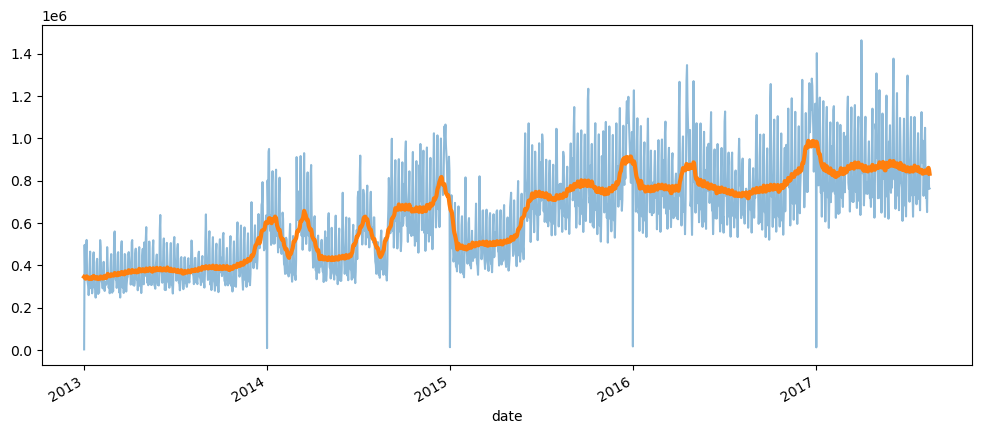

In [55]:
trend = sales['sales'].rolling(window = 30, center = True, min_periods = 15).mean()
plt.figure(figsize = (12,5))
ax = sales['sales'].plot(alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)

In [56]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

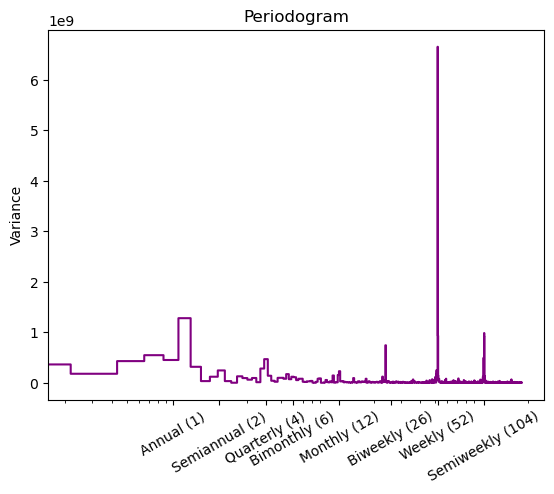

In [58]:
plot_periodogram(sales['sales'])

In [59]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
fourier = CalendarFourier(freq="W", order=4)

In [60]:
dp = DeterministicProcess(
    index=sales.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
    period = 365)
X = dp.in_sample()

In [61]:
from sklearn.linear_model import LinearRegression

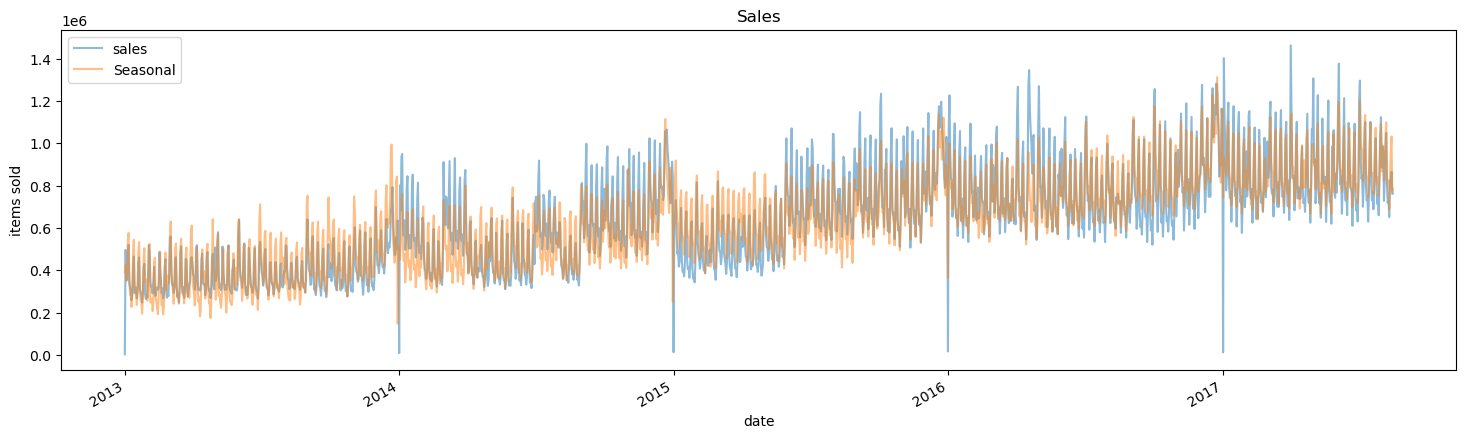

In [62]:
y = sales['sales']
X = dp.in_sample()
model = LinearRegression().fit(X, y)
plt.figure(figsize = (18, 5))
y_pred = pd.Series(
    model.predict(X),
    index=X.index,
    name='Fitted',
)


ax = y.plot( alpha=0.5, title="Sales", ylabel="items sold")
ax = y_pred.plot(alpha = 0.5, ax=ax, label="Seasonal")
ax.legend();

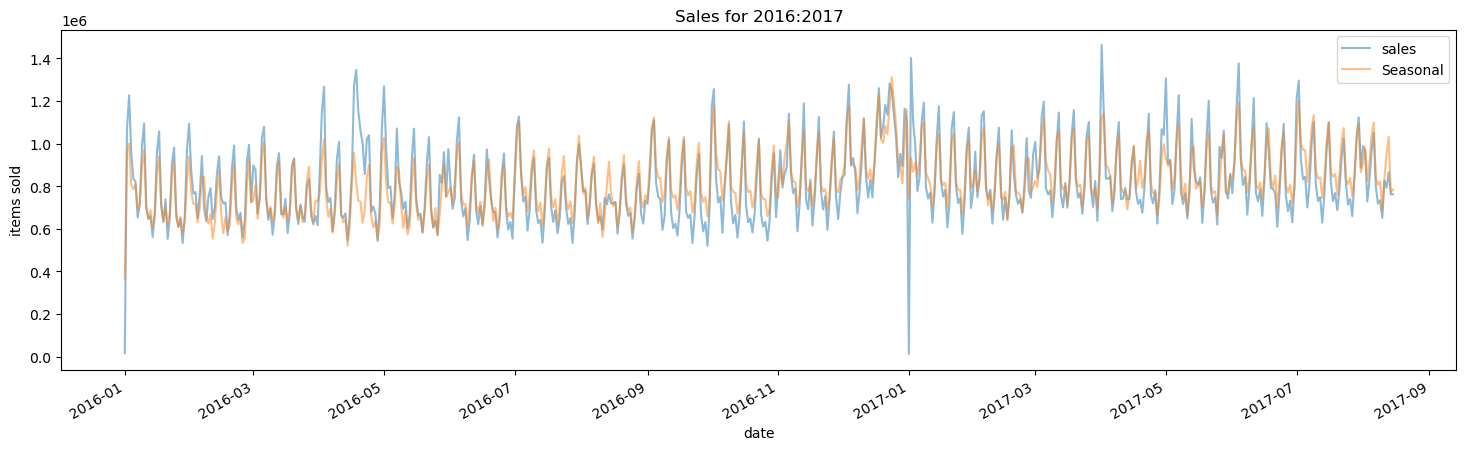

In [63]:
sample_y = y['2016': '2017']
sample_X = X['2016': '2017']
plt.figure(figsize = (18, 5))
sample_pred = pd.Series(
    model.predict(sample_X),
    index=sample_X.index,
    name='Fitted',
)


ax = sample_y.plot( alpha=0.5, title="Sales for 2016:2017", ylabel="items sold")
ax = sample_pred.plot(alpha = 0.5, ax=ax, label="Seasonal")
ax.legend();

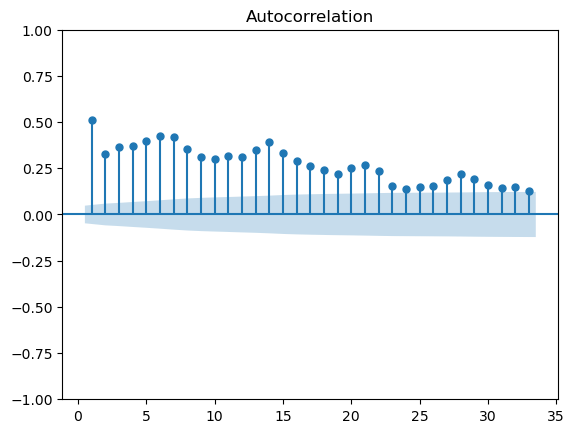

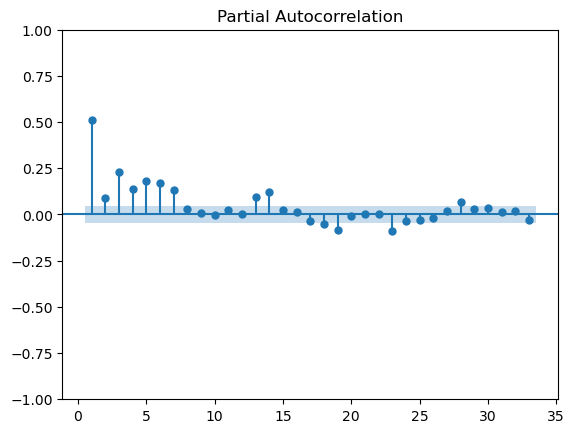

In [69]:
plot_acf(y_deseason, zero = False)
plot_pacf(y_deseason, zero  = False)
plt.show()

We can see that the sales at a particular day are correlated with the sales number on 7 previous days. The PACF shows that the sales are most correalated with the prevous day sales.


# Modeling


I will be using a hybrid model consisting of ARIMA model and XGBoost.
ARIMA model should capture the trend and seasonality that remains in the y_deseason.
XGBoost in turn would capture complex non linear relationships associated with exogenous variables such as oil price and number of items on promotion.


In [70]:
from sklearn.preprocessing import StandardScaler

In [ ]:
onpromotions = train_df.groupby(train_df.index)['onpromotion'].sum()

<Axes: xlabel='sales', ylabel='Count'>

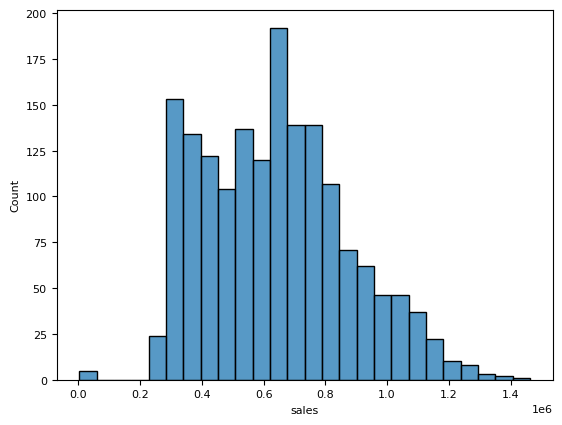

In [106]:
sns.histplot(sales['sales'])

In [107]:
sales['sales'].describe()

count    1.684000e+03
mean     6.375564e+05
std      2.344102e+05
min      2.511619e+03
25%      4.427115e+05
50%      6.321889e+05
75%      7.859455e+05
max      1.463084e+06
Name: sales, dtype: float64

In [72]:
scaler_features = StandardScaler()
scaler_target = StandardScaler()
oil = oil.loc[: '2017-08-15']
train_tot_sales = pd.DataFrame({'sales_deseason' : y_deseason, 'dcoilwtico' : oil['dcoilwtico'], 'onpromotions_total' : onpromotions})
train_tot_sales['dcoilwtico'] = train_tot_sales['dcoilwtico'].interpolate('linear')
train_scaled = train_tot_sales.copy()
train_scaled[['dcoilwtico', 'onpromotions_total']] = scaler_features.fit_transform(train_tot_sales[['dcoilwtico', 'onpromotions_total']])
train_scaled['sales_deseason'] = scaler_target.fit_transform(train_tot_sales[['sales_deseason']])
train_scaled

,sales_deseason,dcoilwtico,onpromotions_total
date,,,
2013-01-01,-4.544173,0.983214,-0.856217
2013-01-02,0.698177,0.983214,-0.856217
2013-01-03,0.108318,0.976595,-0.856217
2013-01-04,-0.282658,0.982435,-0.856217
2013-01-05,-1.162299,0.983473,-0.856217
...,...,...,...
2017-08-11,-0.465942,-0.742743,1.761279
2017-08-12,-1.493705,-0.758576,0.678209
2017-08-13,-1.448520,-0.774410,0.857459


In [73]:
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1  # ARIMA
        self.model_2 = model_2  # XGBoost
        self.y_columns = None

    def fit(self, y, X_2):
        # ARIMA models
        self.model_1 = self.model_1.fit(y)


        y_fit = pd.Series(self.model_1.predict(start=y.index[0], end=y.index[-1]), index=y.index)


        y_resid = y - y_fit

        # Fit the XGBoost model
        self.model_2.fit(X_2, y_resid)


        self.y_columns = y.name if isinstance(y, pd.Series) else y.columns

    def predict(self, index, X_2):
        # Predict with ARIMA
        y_pred_arima = self.model_1.forecast(steps=15)

        # Predict with XGBoost
        y_pred_xgb = pd.Series(self.model_2.predict(X_2), index=X_2.index)


        y_pred = y_pred_arima + y_pred_xgb
        return y_pred


In [74]:
train_scaled  =train_scaled.dropna()
train_scaled.isna().sum()

sales_deseason        0
dcoilwtico            0
onpromotions_total    0
dtype: int64

In [75]:
# Split into train and test
train = train_scaled[:-15]
test = train_scaled[-15:]

In [76]:
y = train['sales_deseason']
X_2 = train[['onpromotions_total', 'dcoilwtico']]


model = BoostedHybrid(
    model_1=ARIMA(y, order=(1,0,0)),
    model_2=XGBRegressor(objective='reg:squarederror')
)
model.fit(y, X_2)

/Users/Heidi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Heidi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Heidi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Heidi/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

In [77]:
y_pred=model.model_2.predict(test[['onpromotions_total', 'dcoilwtico']]) + model.model_1.forecast(steps=15)

/Users/Heidi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [78]:
date_range = pd.date_range(start='2017-08-01', periods=len(test), freq='D')

In [79]:
y_pred.index = date_range

In [81]:
y_pred_reshaped = y_pred.values.reshape(-1, 1)
y_pred_unscaled  = scaler_target.inverse_transform(y_pred_reshaped)
y_pred_unscaled_series = pd.Series(y_pred_unscaled.flatten(), index=y_pred.index)
y_pred_unscaled_series

2017-08-01     25758.144888
2017-08-02     88364.615969
2017-08-03    -14738.829383
2017-08-04     36142.780976
2017-08-05    -92689.708078
2017-08-06   -105791.198235
2017-08-07   -214917.968554
2017-08-08   -178055.215462
2017-08-09    -74092.336316
2017-08-10   -266023.090558
2017-08-11   -179173.390560
2017-08-12   -193976.216120
2017-08-13   -122975.009978
2017-08-14   -234792.485466
2017-08-15   -238163.525497
Freq: D, dtype: float64

In [83]:
y_pred_seasonal = y_pred_unscaled_series + seasonal_component[-15:]

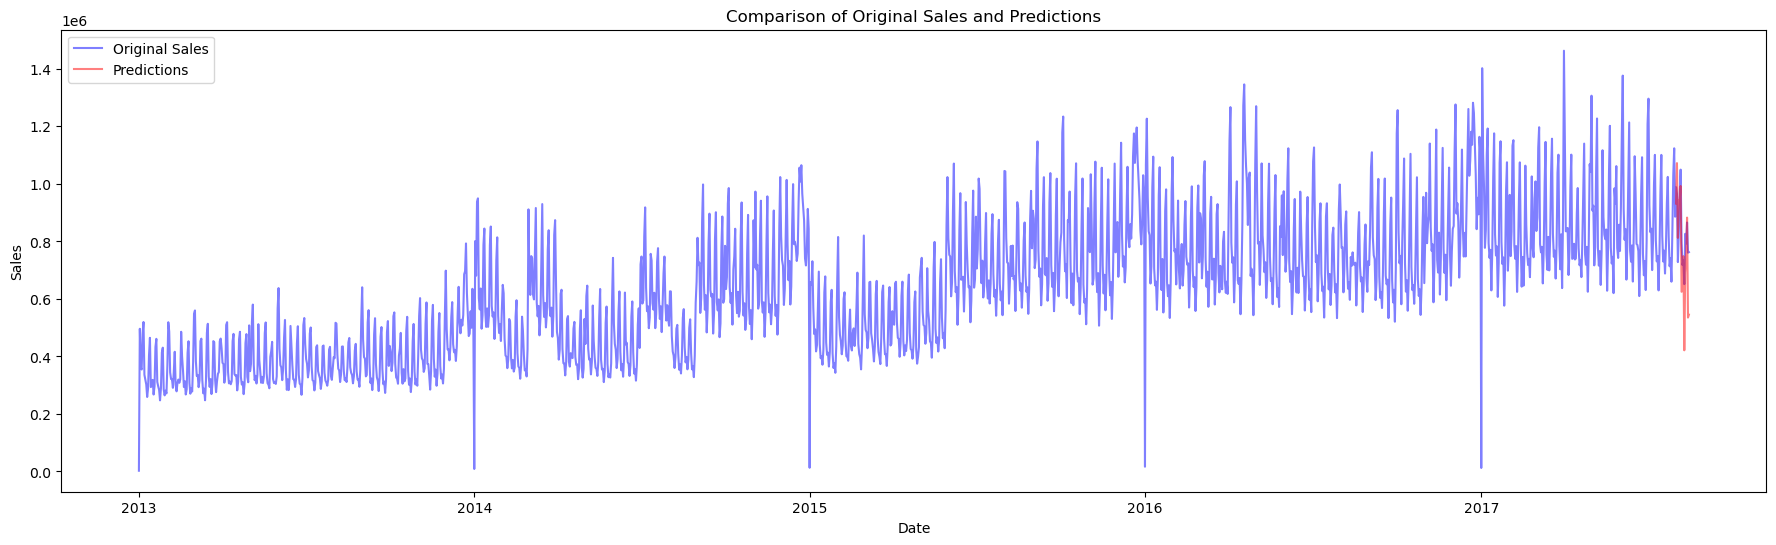

In [85]:
plt.figure(figsize=(22, 6))
plt.plot(sales['sales'], label='Original Sales', color='blue', alpha = 0.5)
plt.plot(y_pred_seasonal , label='Predictions', color='red', alpha = 0.5)
plt.title('Comparison of Original Sales and Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [86]:
y_test = test['sales_deseason']

In [88]:
y_test_reshaped = y_test.values.reshape(-1, 1)
y_test_unscaled  = scaler_target.inverse_transform(y_test_reshaped)
y_test_unscaled_series = pd.Series(y_test_unscaled.flatten(), index=y_test.index)
y_test_unscaled_series

date
2017-08-01     82880.819255
2017-08-02    -19147.395911
2017-08-03    -98956.311677
2017-08-04    -77489.186622
2017-08-05    -70537.690629
2017-08-06    -48987.657620
2017-08-07    -42264.746281
2017-08-08    -88737.408079
2017-08-09    -88566.749275
2017-08-10    -35924.188068
2017-08-11    -45074.796586
2017-08-12   -144499.466535
2017-08-13   -140128.353327
2017-08-14     -9026.943717
2017-08-15    -20894.931858
dtype: float64

In [89]:
y_test_seasonal = y_test_unscaled_series + seasonal_component[-15:]

In [90]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_seasonal, y_pred_seasonal)
mae

106116.4574403384

In [91]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_seasonal, y_pred_seasonal)
print('Mean Squared Error:', mse)

Mean Squared Error: 16559077000.93007


In [92]:
mape = np.mean(np.abs((y_test_seasonal -  y_pred_seasonal) / y_test_seasonal)) * 100

In [93]:
mape

13.594872187474225

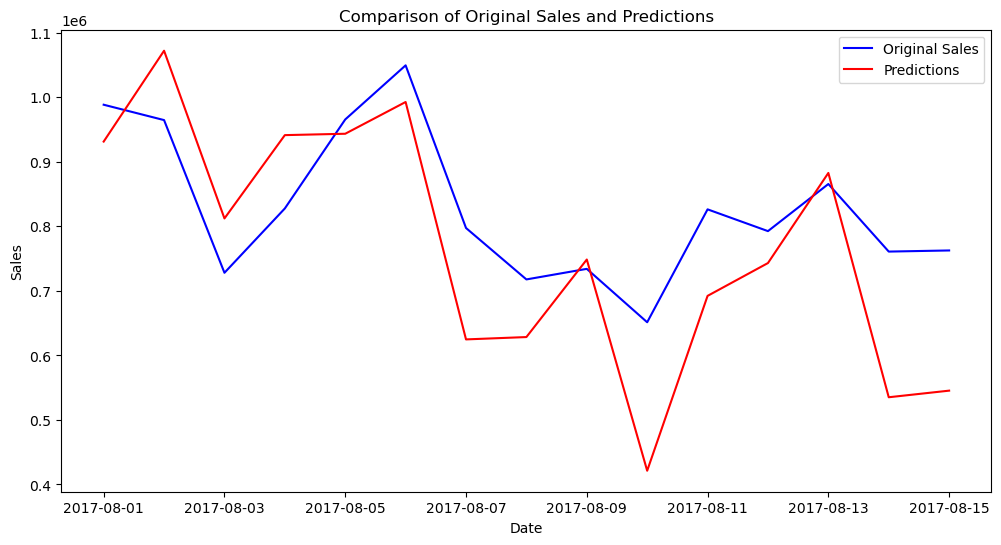

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_seasonal, label='Original Sales', color='blue', alpha = 1)
plt.plot( y_pred_seasonal , label='Predictions', color='red', alpha = 1)
plt.title('Comparison of Original Sales and Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Exploring Residuals

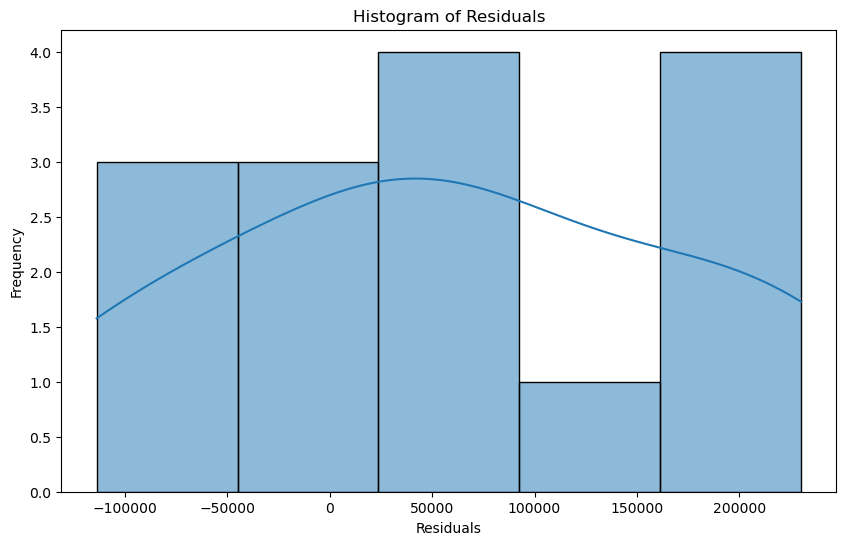

In [95]:
residuals = y_test_seasonal -  y_pred_seasonal
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

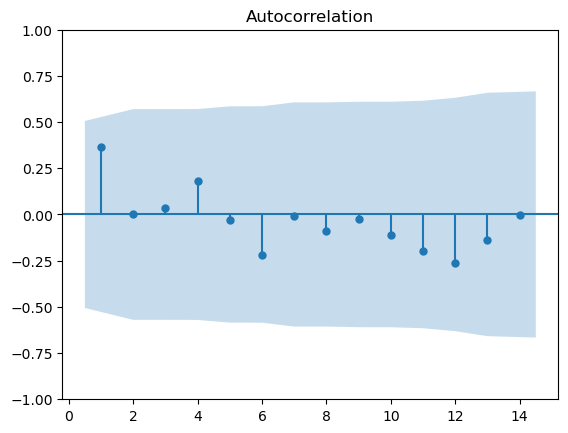

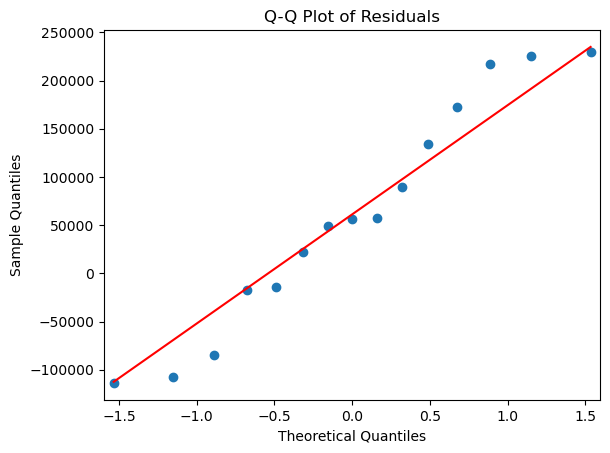

In [96]:
import statsmodels.api as sm

# Calculate the maximum number of lags based on the length of your residuals
max_lags = len(residuals) - 1

# Use the calculated maximum lags or a smaller number if desired
lags_to_use = min(40, max_lags)

sm.graphics.tsa.plot_acf(residuals, lags=lags_to_use, alpha=0.05, zero=False)
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

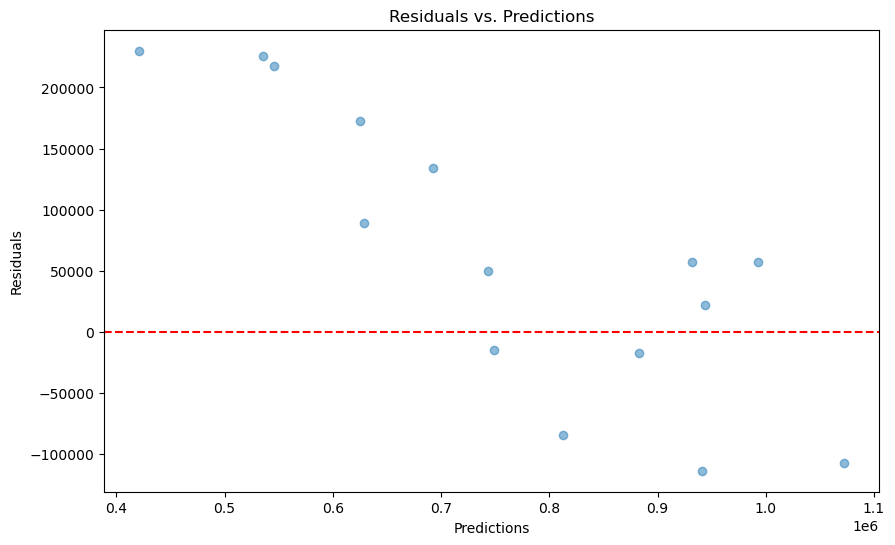

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_seasonal, residuals, alpha=0.5)
plt.title('Residuals vs. Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()